In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#showing how we analyzed polarity and subjectivity using reviews about Hong Kong 
hk_df = pd.read_csv ('Disney-HK.csv')
hk_df.head(5)

,Unnamed: 0,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Location
0,0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,HongKong
1,1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong
2,2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong
3,3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong
4,4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",HongKong


First, extract reviews only

In [3]:
reviews = hk_df['Review_Text']

#### Finding reviews where top n ngram is used and analyze sentiment/emotions about rides, park experience

In [28]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def detect_tb_polarity(text):
    return TextBlob(text).sentiment.polarity
def detect_tb_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def detect_vader_pos(text):
    return vader.polarity_scores(text)['pos']

def detect_vader_neg(text):
    return vader.polarity_scores(text)['neg']

def detect_vader_comp(text):
    return vader.polarity_scores(text)['compound']

In [29]:
hk_df['tb_polarity'] = hk_df.Review_Text.apply(detect_tb_polarity)
hk_df['tb_subjectivity'] = hk_df.Review_Text.apply(detect_tb_subjectivity)

vader = SentimentIntensityAnalyzer()
hk_df['vader_pos'] = hk_df.Review_Text.apply(detect_vader_pos)
hk_df['vader_neg'] = hk_df.Review_Text.apply(detect_vader_neg)
hk_df['vader_comp'] = hk_df.Review_Text.apply(detect_vader_comp)

In [30]:
hk_df.head()

,Unnamed: 0,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Location,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp
0,0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,0.243981,0.561481,0.109,0.000,0.7069
1,1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong,0.236131,0.434649,0.195,0.044,0.9853
2,2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,0.160498,0.422944,0.220,0.022,0.9920
3,3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,0.189286,0.512143,0.154,0.078,0.8425
4,4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",HongKong,0.266667,0.437500,0.098,0.000,0.2846


In [31]:
#assign sentiment based on compound score
hk_df['sentiment'] = ""
for y in range(0,len(hk_df)):
    if hk_df['vader_comp'][y] >= 0.05:
        hk_df['sentiment'][y] = 'positive'
    else:
        hk_df['sentiment'][y] = 'negative'  

<ipython-input-31-b9ce5e75379d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hk_df['sentiment'][y] = 'positive'
<ipython-input-31-b9ce5e75379d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hk_df['sentiment'][y] = 'negative'


In [32]:
hk_df['sentiment'].value_counts()

positive    8725
negative     895
Name: sentiment, dtype: int64

In [33]:
hk_df.drop('Review_ID', axis=1, inplace = True)
hk_df.drop('Unnamed: 0', axis=1, inplace = True)

In [34]:
hk_df = hk_df[hk_df['Year_Month'] != "missing"]
hk_df['year'] = pd.DatetimeIndex(hk_df['Year_Month']).year
#type(ca_1['year'])

hk_df['year'] = pd.to_numeric(hk_df['year'])
hk_df.head(10)

,Rating,Year_Month,Reviewer_Location,Review_Text,Location,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp,sentiment,year
0,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,0.243981,0.561481,0.109,0.000,0.7069,positive,2019
1,4,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong,0.236131,0.434649,0.195,0.044,0.9853,positive,2019
2,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,0.160498,0.422944,0.220,0.022,0.9920,positive,2019
3,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,0.189286,0.512143,0.154,0.078,0.8425,positive,2019
4,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",HongKong,0.266667,0.437500,0.098,0.000,0.2846,positive,2019
5,3,2019-4,Singapore,"Have been to Disney World, Disneyland Anaheim ...",HongKong,-0.065476,0.610397,0.154,0.088,0.9311,positive,2019
6,5,2019-4,India,Great place! Your day will go by and you won't...,HongKong,0.185000,0.590000,0.220,0.087,0.7489,positive,2019
7,3,2019-3,Malaysia,Think of it as an intro to Disney magic for th...,HongKong,0.054722,0.500556,0.109,0.030,0.8345,positive,2019
8,2,2019-4,Australia,"Feel so let down with this place,the Disneylan...",HongKong,-0.067284,0.482099,0.095,0.074,0.5195,positive,2019
9,5,2019-3,India,I can go on talking about Disneyland. Whatever...,HongKong,0.204497,0.394974,0.152,0.041,0.9434,positive,2019


In [35]:
# labeling the data
rating = hk_df["vader_comp"]
def label_func(rating):
    if rating >=0.05:
        return "Positive"
    elif (rating >=0.4) & (rating <= 0.65):
            return "Neutral"
    else:
        return "Negative"
        
hk_df["Sentiment"] = hk_df["vader_comp"].apply(lambda x: label_func(x))   

In [36]:
hk_df.head(2)

,Rating,Year_Month,Reviewer_Location,Review_Text,Location,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp,sentiment,year,Sentiment
0,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,0.243981,0.561481,0.109,0.000,0.7069,positive,2019,Positive
1,4,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong,0.236131,0.434649,0.195,0.044,0.9853,positive,2019,Positive


## Keyword Matching - "Happiest Place on Earth"

In [37]:
specific_words = ['happiest place', 'happiest place on earth']

query = '|'.join(specific_words)

hk_df['query_match'] = hk_df['Review_Text'].str.lower().str.contains(query)

In [38]:
matches = hk_df[(hk_df['query_match'] == True)]
matches.shape

(198, 14)

In [39]:
df_like = hk_df[(hk_df['query_match'] == True) & (hk_df['Sentiment'] == 'Positive')]
df_like

,Rating,Year_Month,Reviewer_Location,Review_Text,Location,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp,sentiment,year,Sentiment,query_match
1,4,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong,0.236131,0.434649,0.195,0.044,0.9853,positive,2019,Positive,True
13,5,2019-4,Philippines,It was indeed the happiest place on earth! My ...,HongKong,0.462500,0.600000,0.295,0.000,0.8547,positive,2019,Positive,True
157,4,2019-3,Australia,"Firstly, it s Disneyland. It s the happies...",HongKong,0.112698,0.386905,0.100,0.042,0.8247,positive,2019,Positive,True
198,5,2018-5,Indonesia,No doubt people keep saying this is the happie...,HongKong,0.455357,0.640873,0.229,0.000,0.9914,positive,2018,Positive,True
205,5,2019-2,Philippines,It is definitely the happiest place on earth. ...,HongKong,0.380000,0.685556,0.191,0.000,0.9393,positive,2019,Positive,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8880,4,2012-1,United States,There's a special connecting train that you ha...,HongKong,0.392460,0.707937,0.149,0.000,0.9748,positive,2012,Positive,True
8884,4,2012-3,New Zealand,"This was our first Disneyland experience. And,...",HongKong,0.297500,0.486667,0.285,0.000,0.9538,positive,2012,Positive,True
8982,5,2012-2,Australia,This was our second visit to Hong Kong Disneyl...,HongKong,0.228610,0.611378,0.169,0.029,0.9738,positive,2012,Positive,True
9201,4,2011-4,Philippines,We truly enjoyed our visit to Hong Kong Disney...,HongKong,0.241875,0.521389,0.183,0.022,0.9960,positive,2011,Positive,True


## Plotting to see polarity positive or negative reviews 

<AxesSubplot:xlabel='tb_polarity', ylabel='Density'>

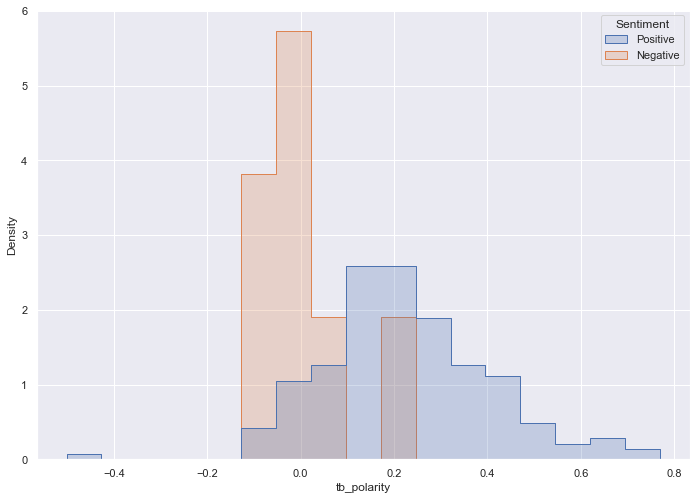

In [40]:
# the size of A4 paper
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(
    matches, x="tb_polarity", hue="Sentiment", element="step",
    stat="density", common_norm=False,
)

### Polarity of reviews on happiest place on earth:  people who have negative things to say also have higher polarity than the one that have positive things to say. Linking back to the reviews, we can say that people who holds negative opinions on it are more harsh in their reviews because they came in with higher expectations and ended up having a unsatisfied/ dismatched experience.  

## Plotting to see how subjective positive and negative reviews are 

<AxesSubplot:xlabel='tb_subjectivity', ylabel='Density'>

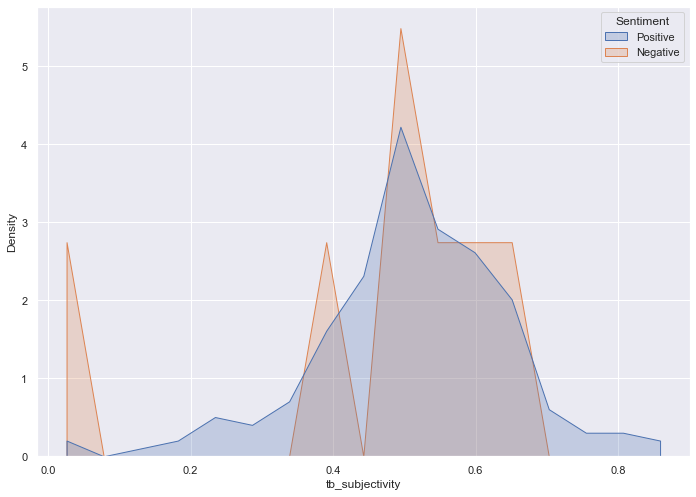

In [41]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(
    matches, x="tb_subjectivity", hue="Sentiment", element="poly",
    stat="density", common_norm=False,
)

### Seems like people who have positive things to say are more subjective in their reviews than those some of the naysayers !

In [42]:
reviews_like = df_like['Review_Text']

In [43]:
all_sentences2 = []

for word in reviews_like:
    all_sentences2.append(word)

all_sentences2

["Its been a while since d last time we visit HK Disneyland .. Yet, this time we only stay in Tomorrowland .. AKA Marvel land!Now they have Iron Man Experience n d Newly open Ant Man n d Wasp!!Ironman .. Great feature n so Exciting, especially d whole scenery of HK (HK central area to Kowloon)!Antman .. Changed by previous Buzz lightyear! More or less d same, but I'm expecting to have something most!!However, my boys like it!!Space Mountain .. Turns into Star Wars!! This 1 is Great!!!For cast members (staffs) .. Felt bit MINUS point from before!!! Just dun feel like its a Disney brand!! Seems more local like Ocean Park or even worst!!They got no SMILING face, but just wanna u to enter n attraction n leave!!Hello this is supposed to be Happiest Place on Earth brand!! But, just really Dont feel it!!Bakery in Main Street now have more attractive delicacies n Disney theme sweets .. These are Good Points!!Last, they also have Starbucks now inside the theme park!!",
 "It was indeed the happi

## plot a wordcloud to see what people are talking about

In [44]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")
    

In [45]:
tags = reviews_like.map(lambda x:x.lower().split('|')).values
splt_tags = ' '.join(reviews_like)

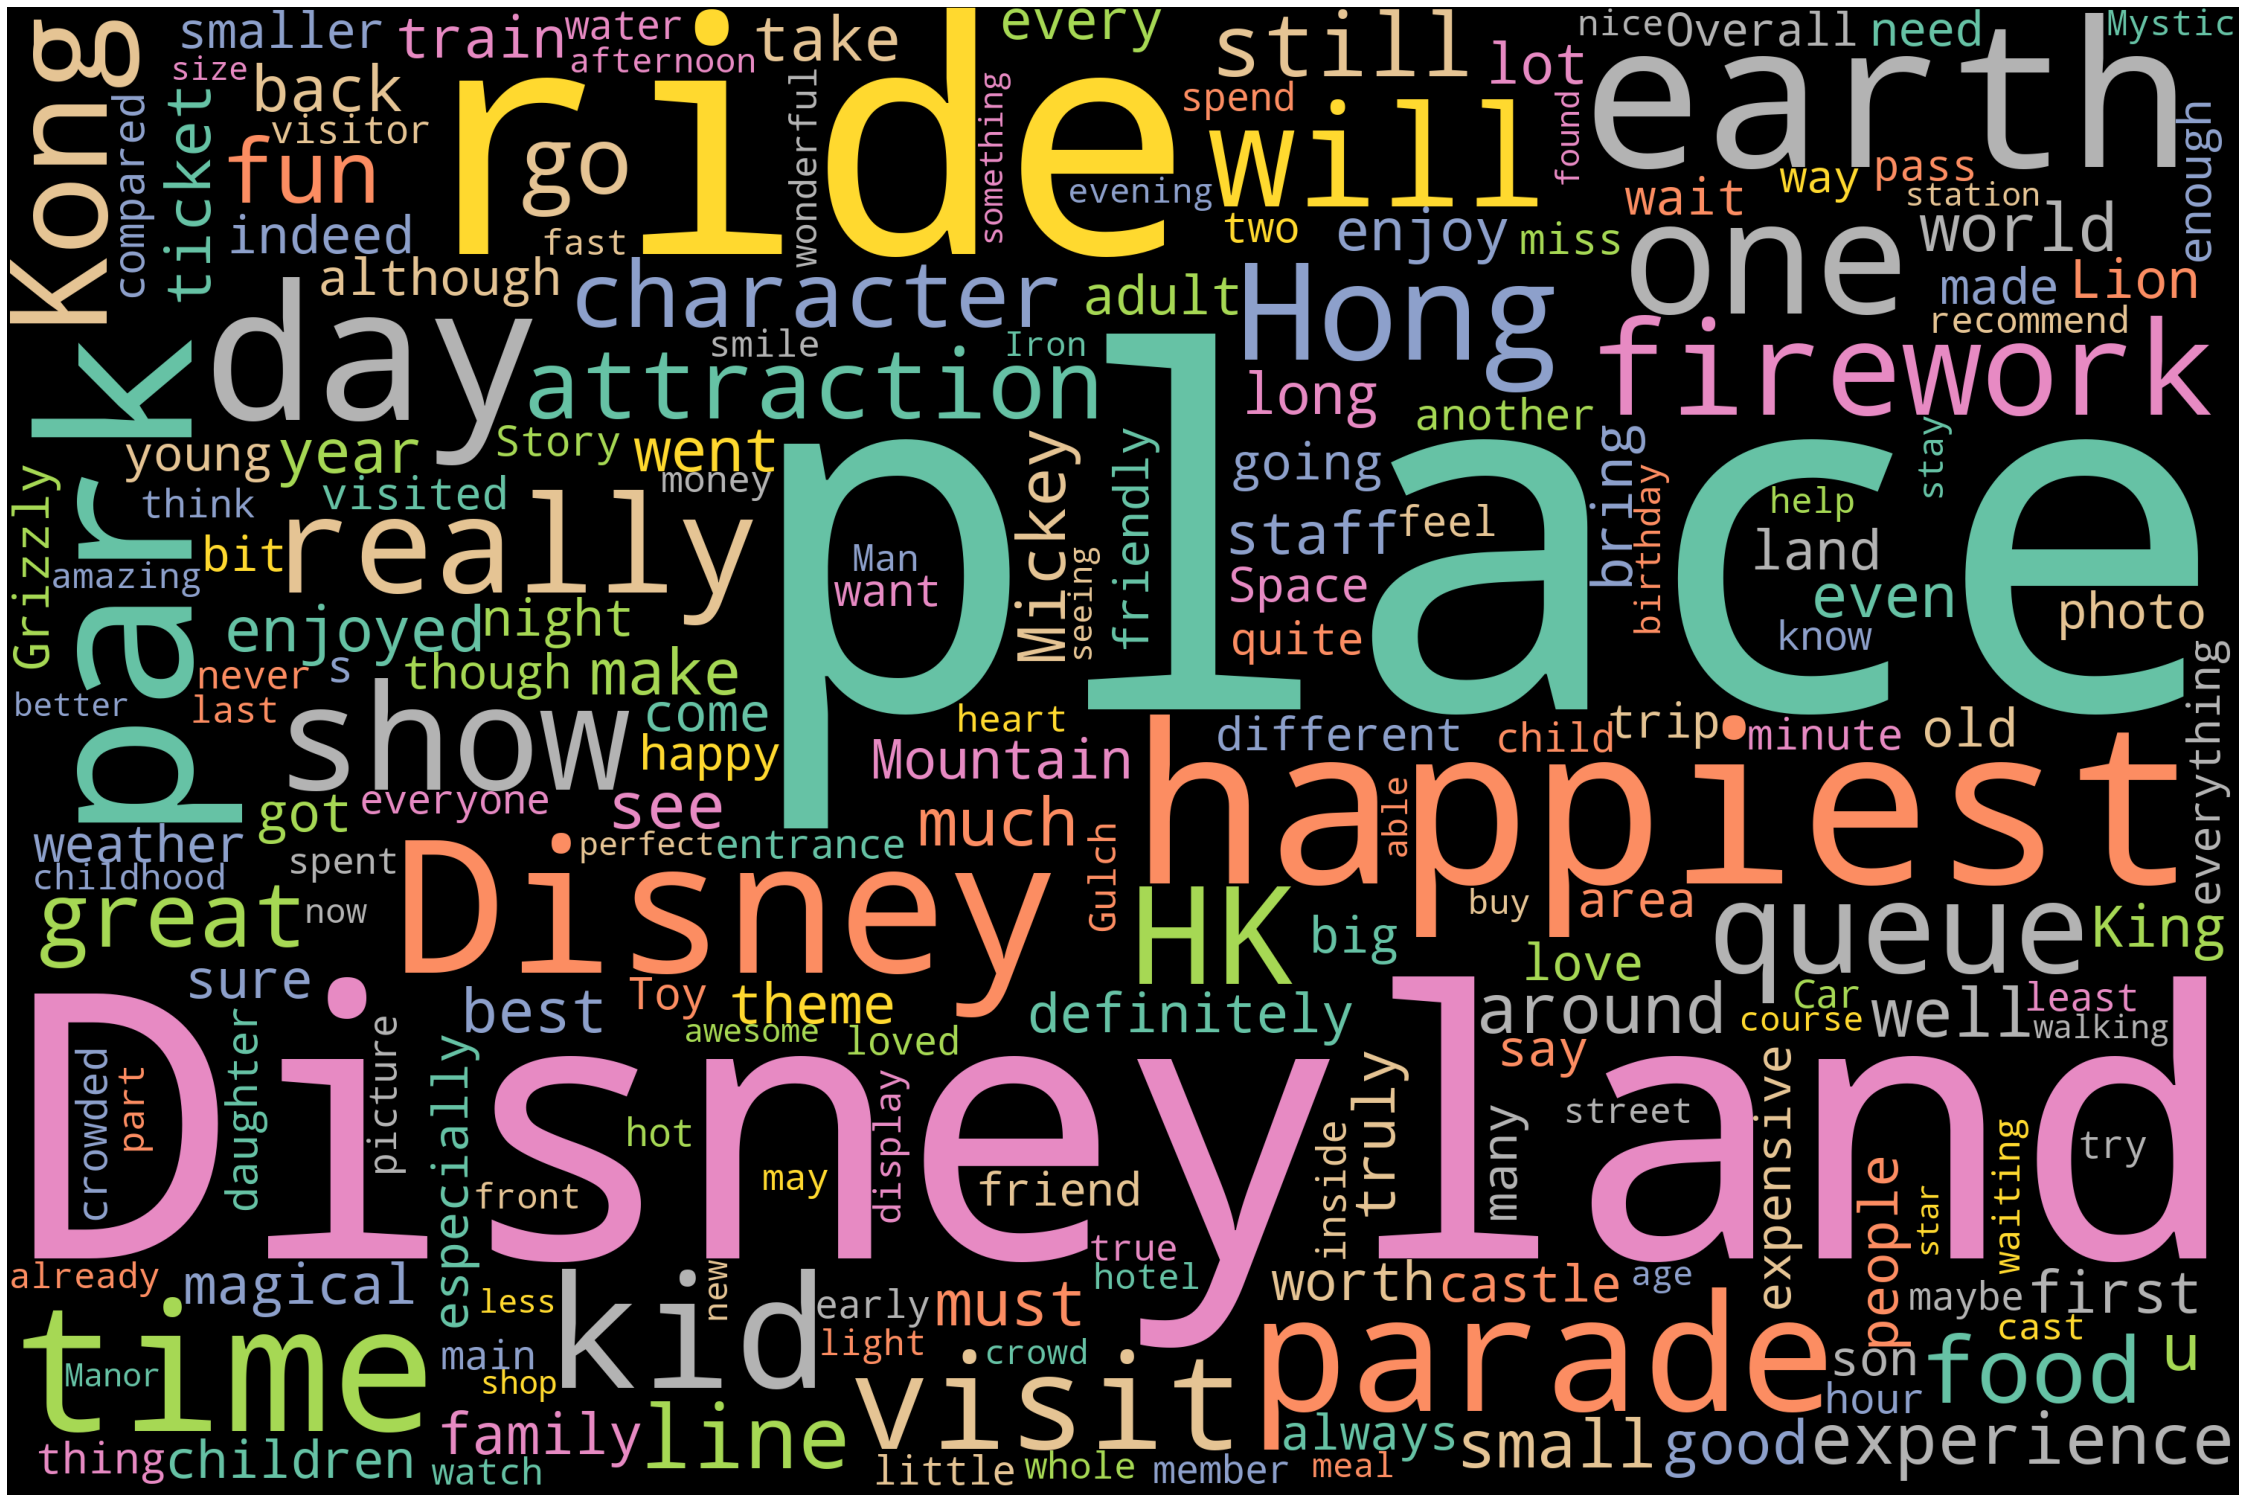

In [230]:
wordcloud = WordCloud(width = 3000, height = 2000, 
                      random_state=1, background_color='black', 
                      colormap='Set2', collocations=False, 
                      stopwords = STOPWORDS).generate(' '.join(splt_tags.split('|')))
# Plot
plot_cloud(wordcloud)

### I was trying to see the subject of people reviews? Like if for fast pass, people's reviews talk about time more. But it seems in "happiest place on earth" there is no definitive insight - I can't try to extract much insight out of it

## Keyword Matching - "Fast Pass"

In [169]:
specific_words = ['fast pass']

query = '|'.join(specific_words)

hk_df['query_match'] = hk_df['Review_Text'].str.lower().str.contains(query)
# hk_df['word matched'] = hk_df['Review_Text'].str.extract( '({})'.format(query) )

hk_df.head(5)

<ipython-input-169-2c3b2968a6d1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_df['query_match'] = ca_df['Review_Text'].str.lower().str.contains(query)


,Unnamed: 0,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Location,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp,year,query_match,word matched,Sentiment
0,0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,0.243981,0.561481,0.109,0.000,0.7069,2019,False,NaN,Positive
1,1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong,0.236131,0.434649,0.195,0.044,0.9853,2019,False,NaN,Positive
2,2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,0.160498,0.422944,0.220,0.022,0.9920,2019,False,NaN,Positive
3,3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,0.189286,0.512143,0.154,0.078,0.8425,2019,False,NaN,Positive
4,4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",HongKong,0.266667,0.437500,0.098,0.000,0.2846,2019,False,NaN,Positive


In [57]:
matches2 = hk_df[(hk_df['query_match'] == True)]
matches2 

,Rating,Year_Month,Reviewer_Location,Review_Text,Location,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp,sentiment,year,Sentiment,query_match
1,4,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong,0.236131,0.434649,0.195,0.044,0.9853,positive,2019,Positive,True
13,5,2019-4,Philippines,It was indeed the happiest place on earth! My ...,HongKong,0.462500,0.600000,0.295,0.000,0.8547,positive,2019,Positive,True
157,4,2019-3,Australia,"Firstly, it s Disneyland. It s the happies...",HongKong,0.112698,0.386905,0.100,0.042,0.8247,positive,2019,Positive,True
198,5,2018-5,Indonesia,No doubt people keep saying this is the happie...,HongKong,0.455357,0.640873,0.229,0.000,0.9914,positive,2018,Positive,True
205,5,2019-2,Philippines,It is definitely the happiest place on earth. ...,HongKong,0.380000,0.685556,0.191,0.000,0.9393,positive,2019,Positive,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8880,4,2012-1,United States,There's a special connecting train that you ha...,HongKong,0.392460,0.707937,0.149,0.000,0.9748,positive,2012,Positive,True
8884,4,2012-3,New Zealand,"This was our first Disneyland experience. And,...",HongKong,0.297500,0.486667,0.285,0.000,0.9538,positive,2012,Positive,True
8982,5,2012-2,Australia,This was our second visit to Hong Kong Disneyl...,HongKong,0.228610,0.611378,0.169,0.029,0.9738,positive,2012,Positive,True
9201,4,2011-4,Philippines,We truly enjoyed our visit to Hong Kong Disney...,HongKong,0.241875,0.521389,0.183,0.022,0.9960,positive,2011,Positive,True


## Plotting to see how polarity positive or negative reviews about fast passes

<AxesSubplot:xlabel='tb_polarity', ylabel='Density'>

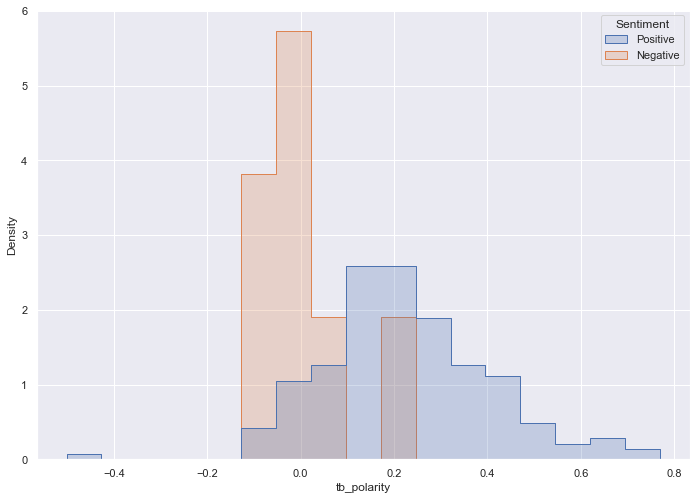

In [58]:
# the size of A4 paper
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(
    matches2, x="tb_polarity", hue="Sentiment", element="step",
    stat="density", common_norm=False,
)

### Since we are looking at fast pass, the ones that are more negative reviews that have high polarity, this means that people who are unhappy in these reviews are really not grumpy.

## Plotting to see how subjective positive or negative reviews are about fast passes

<AxesSubplot:xlabel='tb_subjectivity', ylabel='Density'>

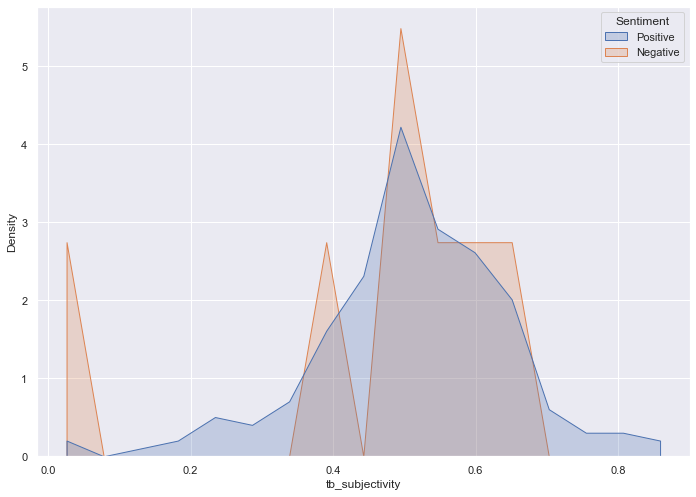

In [59]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(
    matches2, x="tb_subjectivity", hue="Sentiment", element="poly",
    stat="density", common_norm=False,
)

### It seems people who are really grumpy about fast pass are also subjective in reviews! In other words, they aren't just venting without considering the facts!

## for fast pass related reviews, it seems naturally people are talking about date and time more in these reviews.

## Keyword Matching - "Small World"

In [83]:
specific_words = ['small world']

query = '|'.join(specific_words)

hk_df['query_match'] = hk_df['Review_Text'].str.lower().str.contains(query)
# hk_df['word matched'] = hk_df['Review_Text'].str.extract( '({})'.format(query) )

hk_df.head(5)

,Rating,Year_Month,Reviewer_Location,Review_Text,Location,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp,sentiment,year,Sentiment,query_match
0,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,0.243981,0.561481,0.109,0.000,0.7069,positive,2019,Positive,True
1,4,2019-5,Philippines,Its been a while since d last time we visit HK...,HongKong,0.236131,0.434649,0.195,0.044,0.9853,positive,2019,Positive,False
2,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,HongKong,0.160498,0.422944,0.220,0.022,0.9920,positive,2019,Positive,False
3,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,HongKong,0.189286,0.512143,0.154,0.078,0.8425,positive,2019,Positive,False
4,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",HongKong,0.266667,0.437500,0.098,0.000,0.2846,positive,2019,Positive,False


In [84]:
matches3 = hk_df[(hk_df['query_match'] == True)]
matches3 

,Rating,Year_Month,Reviewer_Location,Review_Text,Location,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp,sentiment,year,Sentiment,query_match
0,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,HongKong,0.243981,0.561481,0.109,0.000,0.7069,positive,2019,Positive,True
90,5,2019-4,United Kingdom,Buy your discounted tickets on Klook (thus no ...,HongKong,0.125054,0.543441,0.097,0.063,0.8758,positive,2019,Positive,True
121,5,2019-2,China,"Without a doubt, a true Disney experience.The ...",HongKong,0.149242,0.583838,0.145,0.044,0.8847,positive,2019,Positive,True
208,4,2019-2,Singapore,A wholesome place to take the kids. Only gripe...,HongKong,0.142500,0.467500,0.092,0.035,0.5574,positive,2019,Positive,True
218,4,2019-1,United States,It was fun to go to HK Disneyland. We stayed a...,HongKong,0.152193,0.387281,0.093,0.024,0.9047,positive,2019,Positive,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9359,3,2011-7,United States,I know... I know... I get it... We are America...,HongKong,0.089974,0.461979,0.059,0.039,0.7115,positive,2011,Positive,True
9365,5,2011-6,Malaysia,Regardless how many times I visited Disneyland...,HongKong,0.158033,0.488948,0.184,0.030,0.9993,positive,2011,Positive,True
9382,4,2011-6,Singapore,Disney lovers should visit Hong Kong Disneylan...,HongKong,0.375149,0.597024,0.268,0.000,0.9974,positive,2011,Positive,True
9416,5,2011-3,United States,Disneyland Hong Kong really impressed me and m...,HongKong,0.239412,0.526818,0.191,0.032,0.9983,positive,2011,Positive,True


<AxesSubplot:xlabel='tb_polarity', ylabel='Density'>

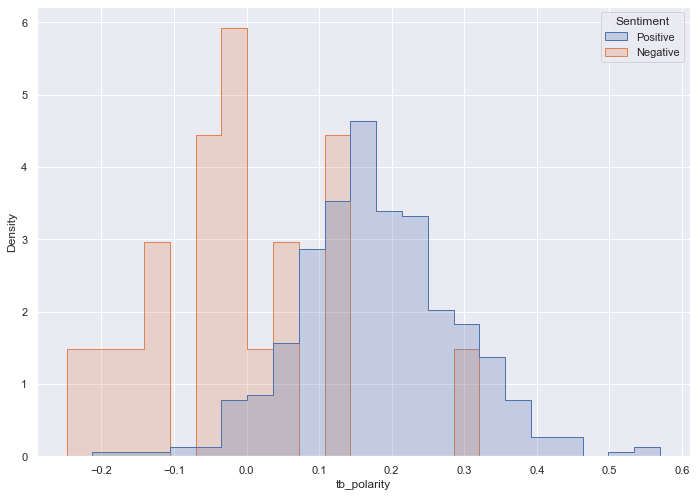

In [87]:
# the size of A4 paper
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(
    matches3, x="tb_polarity", hue="Sentiment", element="step",
    stat="density", common_norm=False,
)

<AxesSubplot:xlabel='tb_subjectivity', ylabel='Density'>

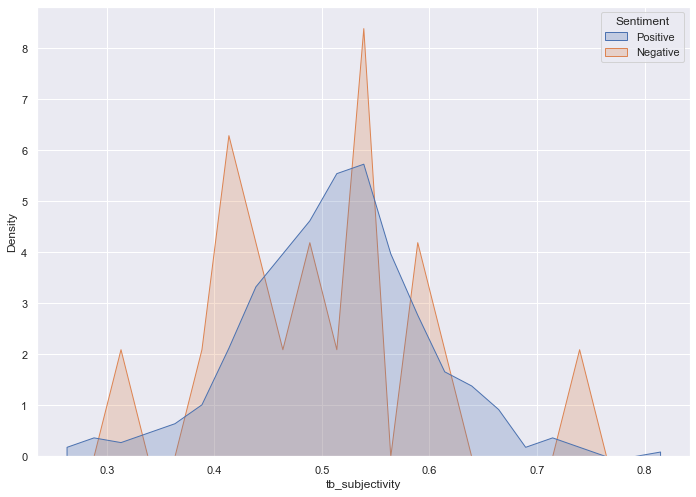

In [88]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(
    matches3, x="tb_subjectivity", hue="Sentiment", element="poly",
    stat="density", common_norm=False,
)

In [ ]:
## plotting another word cloud

In [89]:
tags3 = review_dislike.map(lambda x:x.lower().split('|')).values
splt_tags3 = ' '.join(review_dislike)

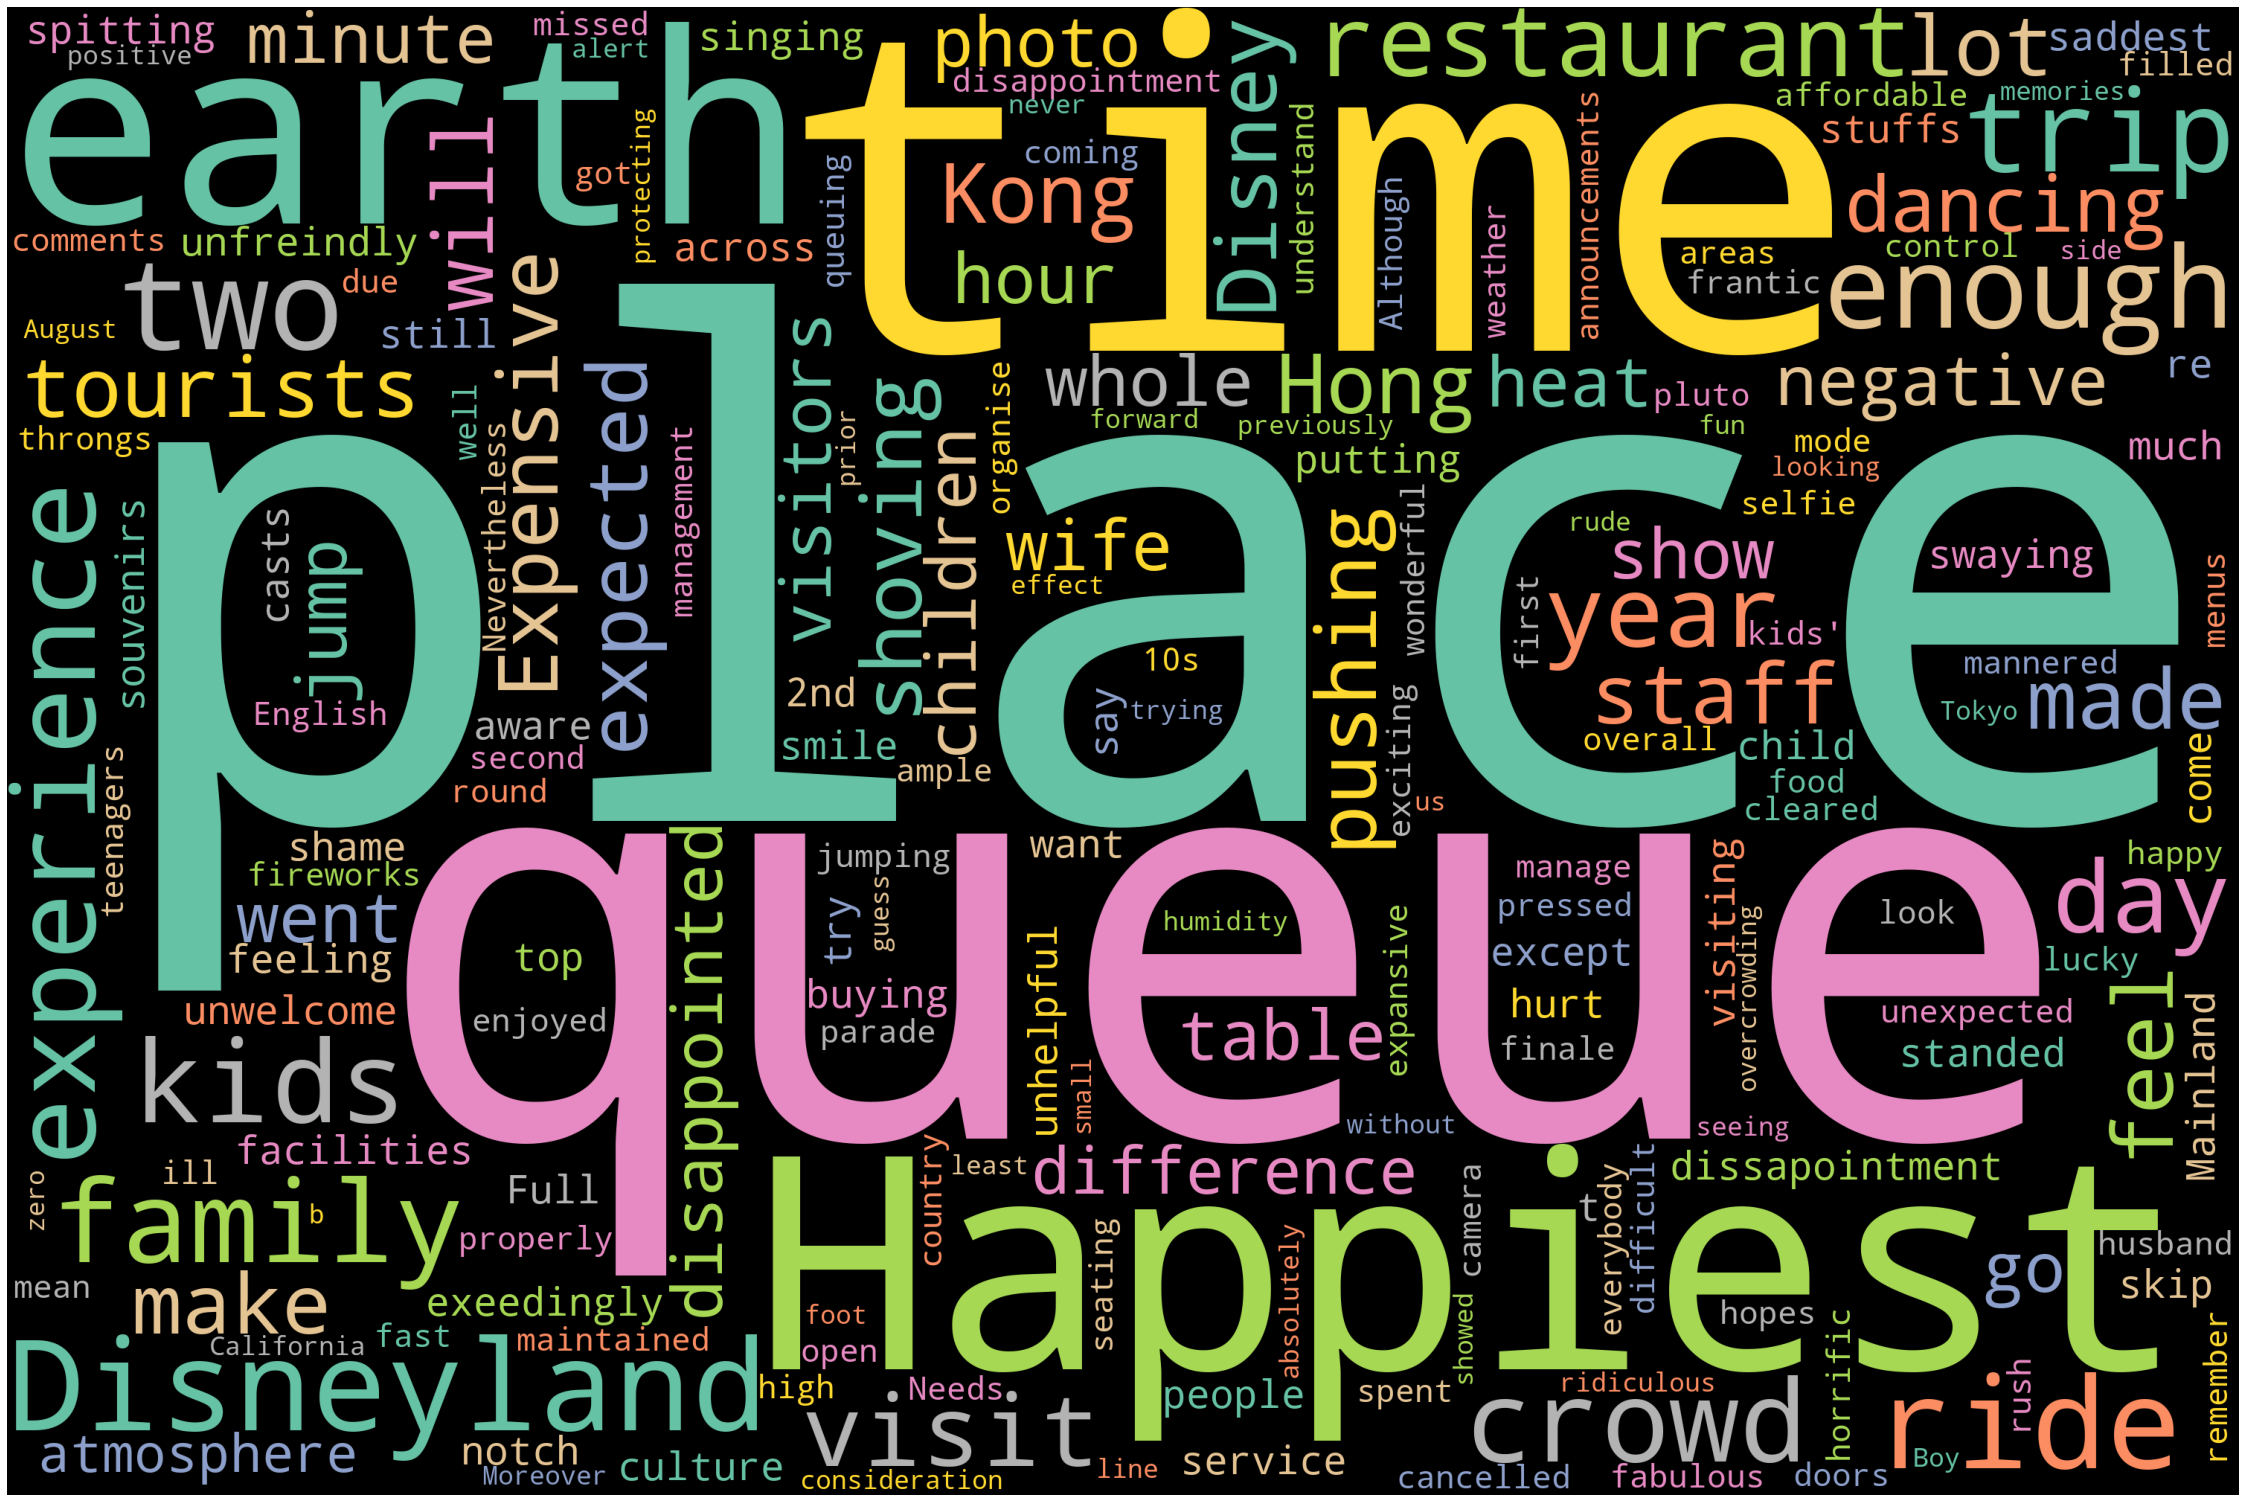

In [91]:
wordcloud3 = WordCloud(width = 3000, height = 2000, 
                      random_state=1, background_color='black', 
                      colormap='Set2', collocations=False, 
                      stopwords = STOPWORDS).generate(' '.join(splt_tags3.split('|')))
# Plot
plot_cloud(wordcloud3)